In [1]:
# Стандартные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Масштабирование, поиск гиперпараметров, метрики
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# EDA

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# Уникальные значения для категориальных колонок
for col in df.columns:
    if col not in df.describe().columns:
        print(f"Column {col} has {df[col].unique()}")

Column customerID has ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column gender has ['Female' 'Male']
Column Partner has ['Yes' 'No']
Column Dependents has ['No' 'Yes']
Column PhoneService has ['No' 'Yes']
Column MultipleLines has ['No phone service' 'No' 'Yes']
Column InternetService has ['DSL' 'Fiber optic' 'No']
Column OnlineSecurity has ['No' 'Yes' 'No internet service']
Column OnlineBackup has ['Yes' 'No' 'No internet service']
Column DeviceProtection has ['No' 'Yes' 'No internet service']
Column TechSupport has ['No' 'Yes' 'No internet service']
Column StreamingTV has ['No' 'Yes' 'No internet service']
Column StreamingMovies has ['No' 'Yes' 'No internet service']
Column Contract has ['Month-to-month' 'One year' 'Two year']
Column PaperlessBilling has ['Yes' 'No']
Column PaymentMethod has ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column Churn has ['No' 'Yes']


In [15]:
# Пропущенные значения
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Дублированные значения
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Наличие выбросов в данных

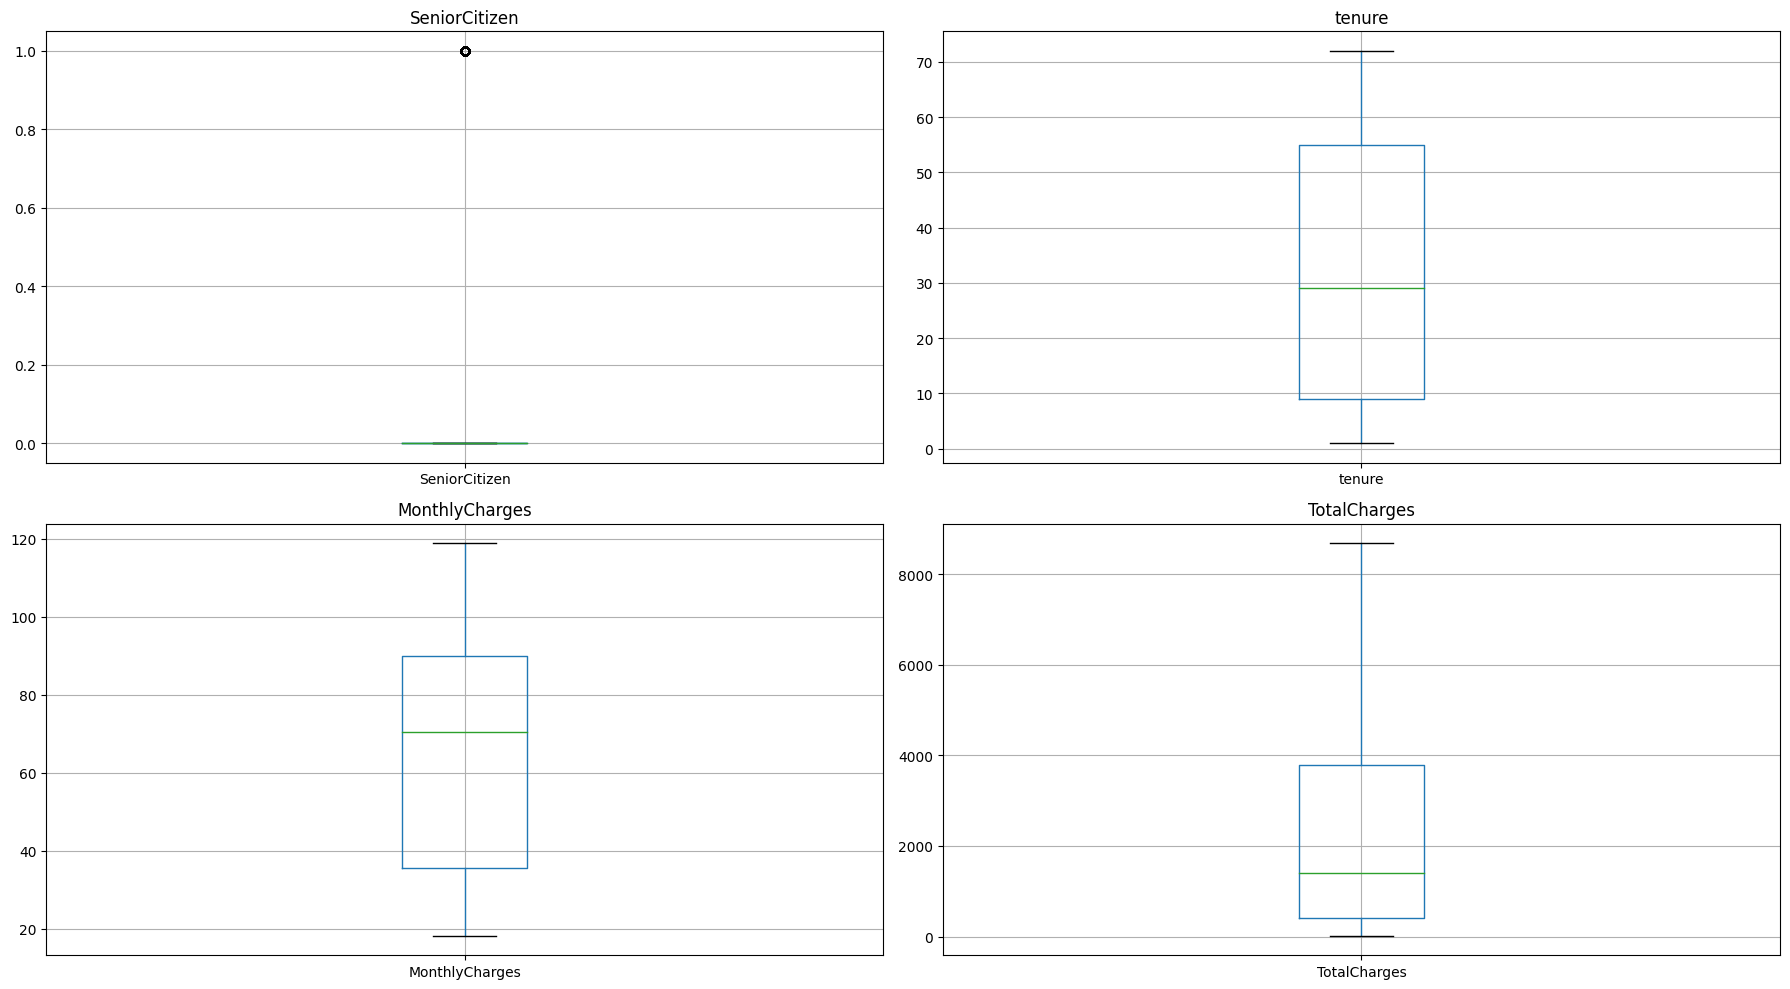

In [19]:
n_features = 4
n_cols = 2
n_rows = np.ceil(n_features / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
ax = ax.flatten()
for i, feature in enumerate(df.describe()):
    if feature in df.describe().columns:
        df[[feature]].boxplot(ax=ax[i])
        ax[i].set_title(feature)
plt.tight_layout()
plt.show()

## Корреляция между переменными

In [30]:
corr_df = df.drop('customerID', axis=1)
corr_df['Churn'] = corr_df['Churn'].map({'No': 0, 'Yes': 1}) # преобразование целевой переменной
                                                             # в числовой тип

C:\Users\Турбо\AppData\Local\Temp\ipykernel_7240\3554130200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

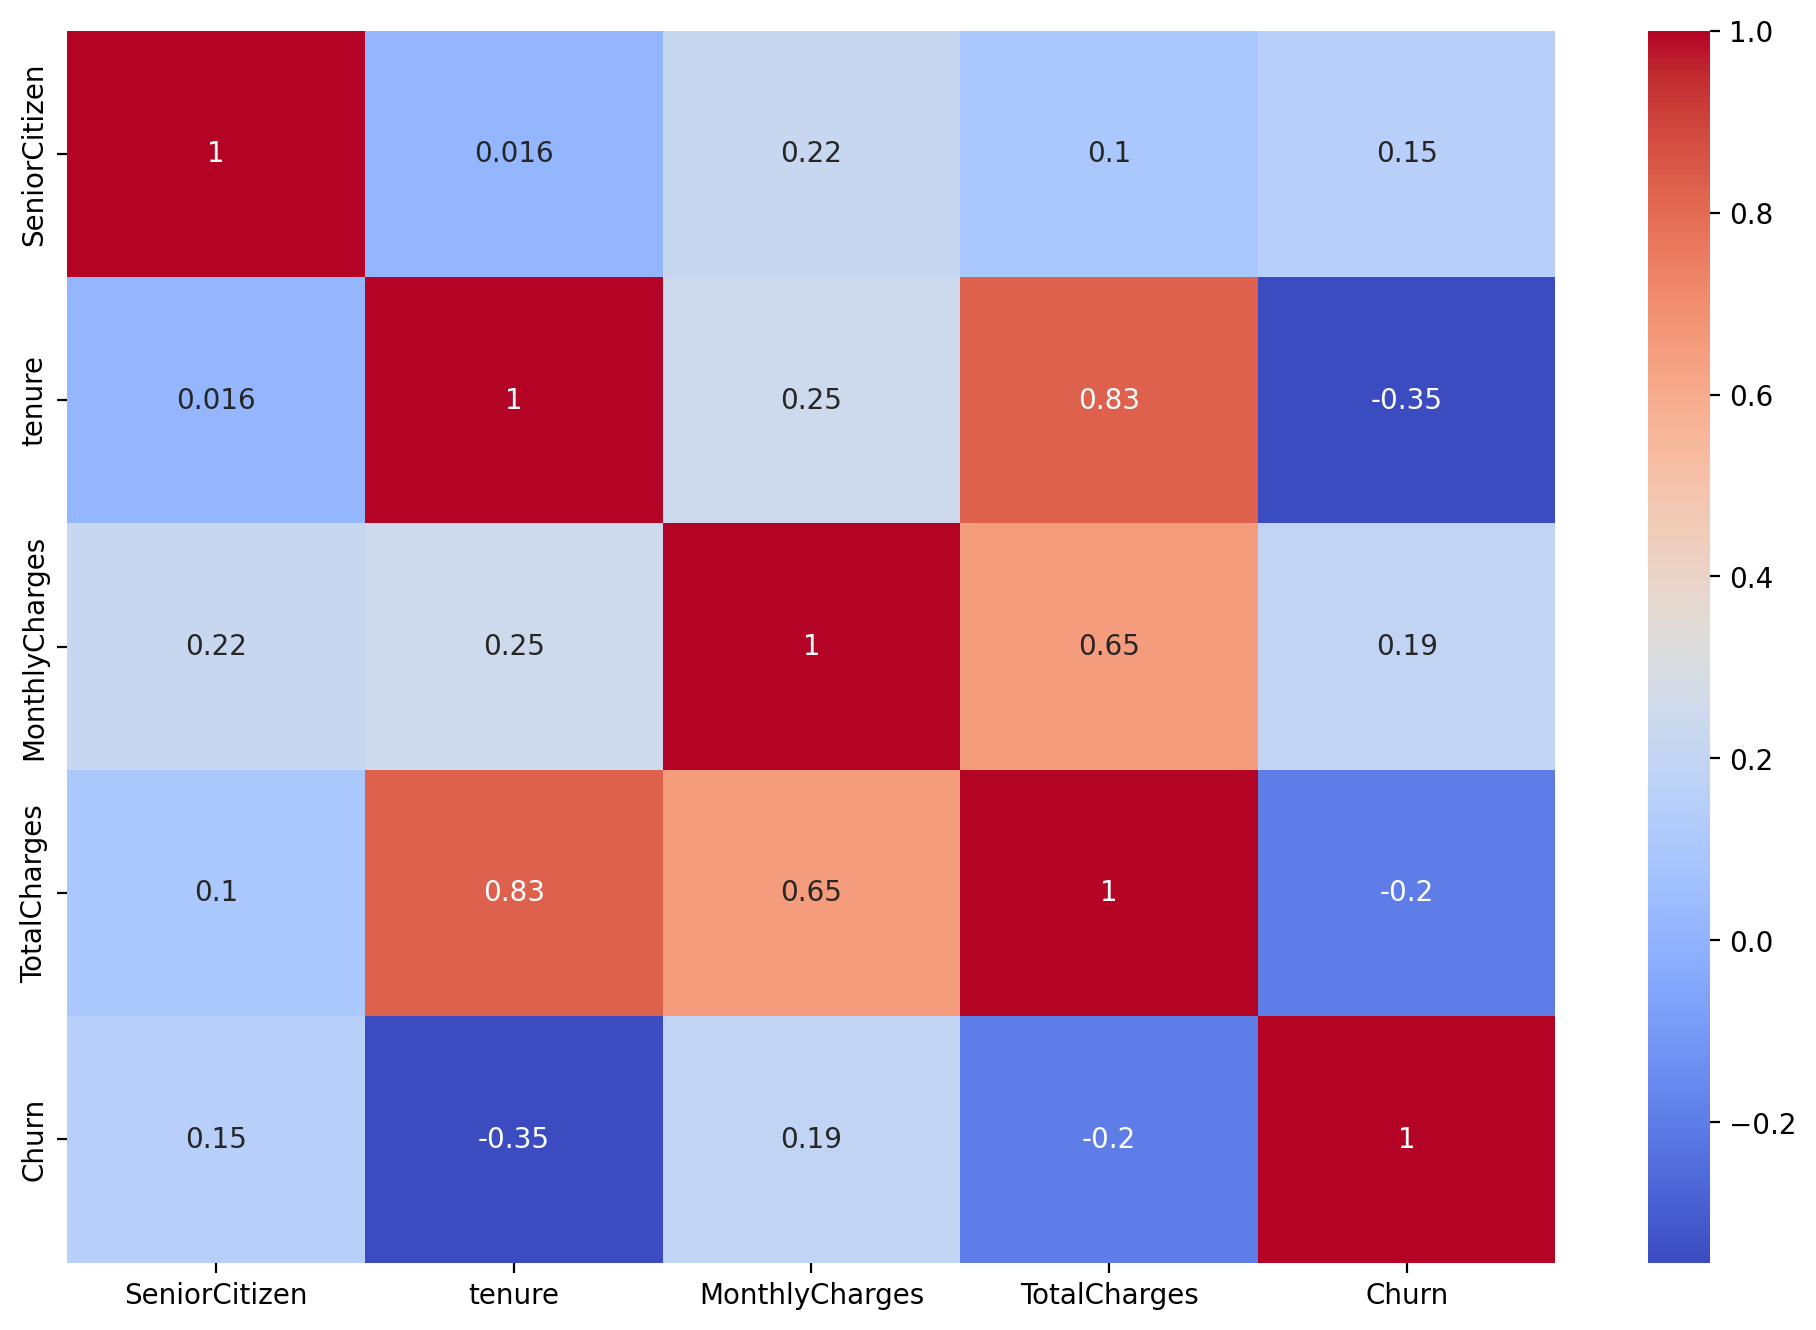

In [35]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

## Баланс классов

<AxesSubplot: xlabel='Churn', ylabel='count'>

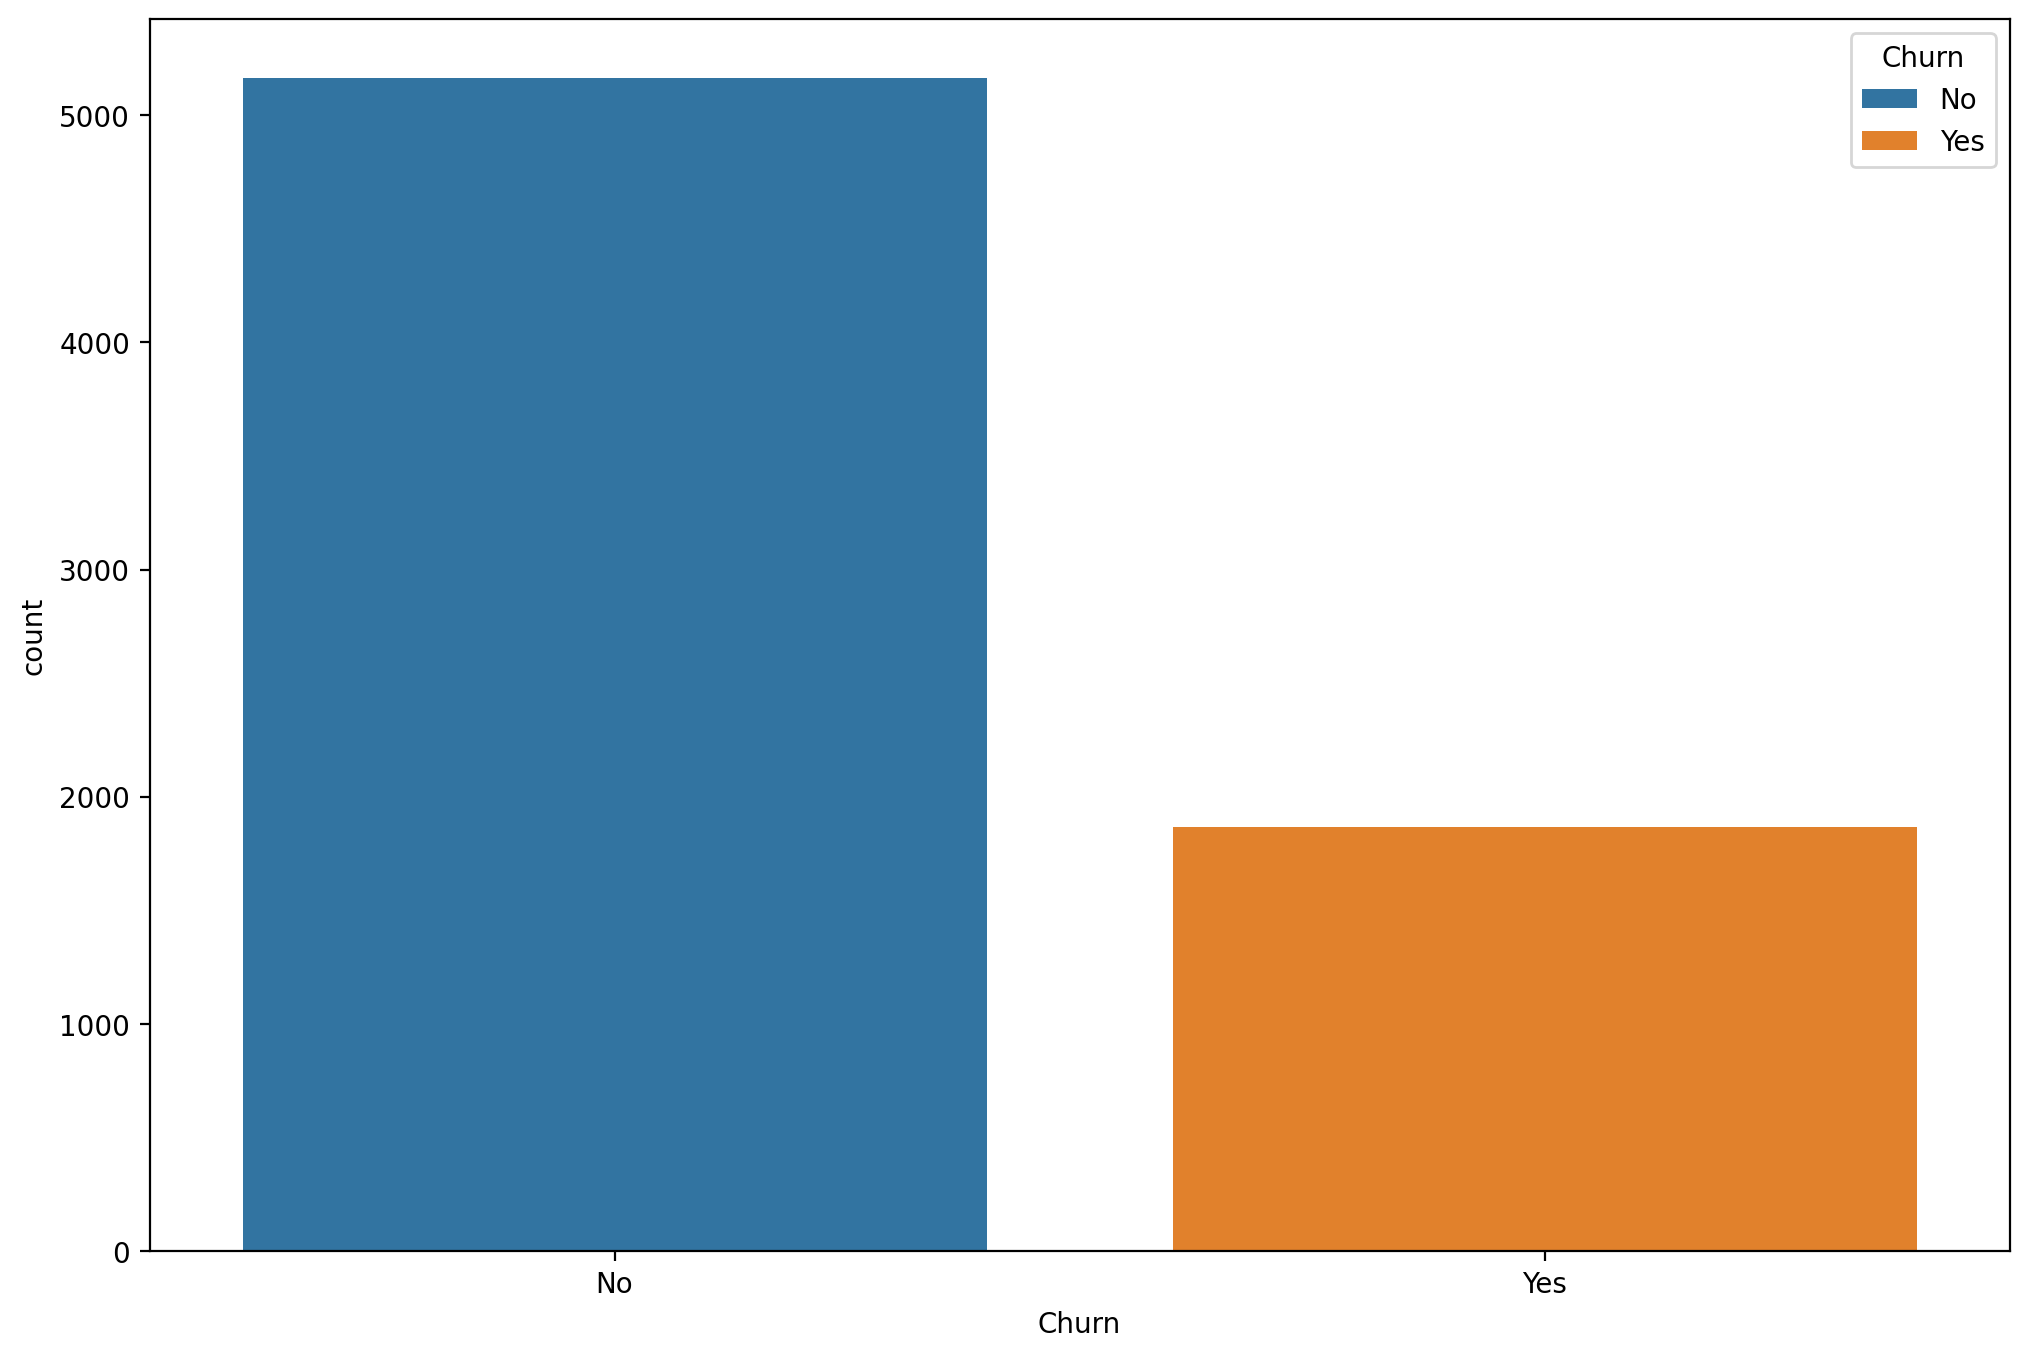

In [43]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='Churn', hue='Churn', dodge=False)

## Подсчёт значений для всех категориальных столбцов

In [89]:
categorical_df = df.drop('customerID', axis=1)
categorical_df = categorical_df.select_dtypes(include='object')

In [90]:
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [119]:
def plot_countplot(col, hue, palette1='icefire', palette2='rocket', fig_size=(12,6)):
    print(df[col].value_counts().to_dict())
    fig, ax = plt.subplots(2, 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts(ascending=True).index, palette=palette1, ax=ax[0])
    sns.countplot(data=df, x=col, hue=hue, order=df[col].value_counts(ascending=True).index, palette=palette2, ax=ax[1])
    plt.tight_layout()
    plt.legend(loc=(1.05, 0.5), title='Churn')
    plt.show()

{'Male': 3549, 'Female': 3483}


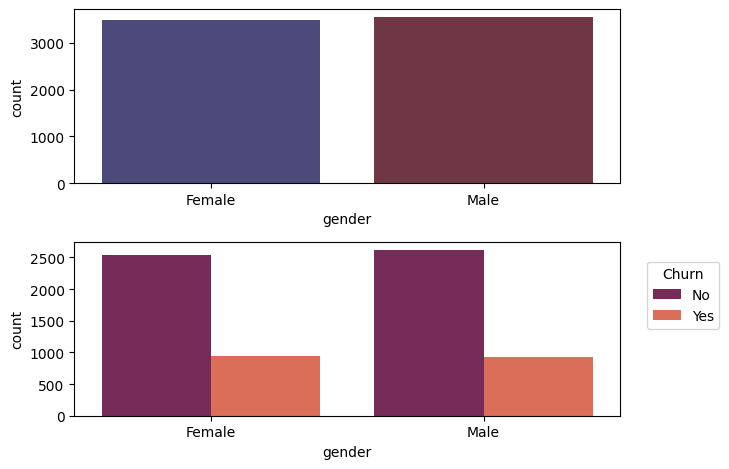

{'No': 3639, 'Yes': 3393}


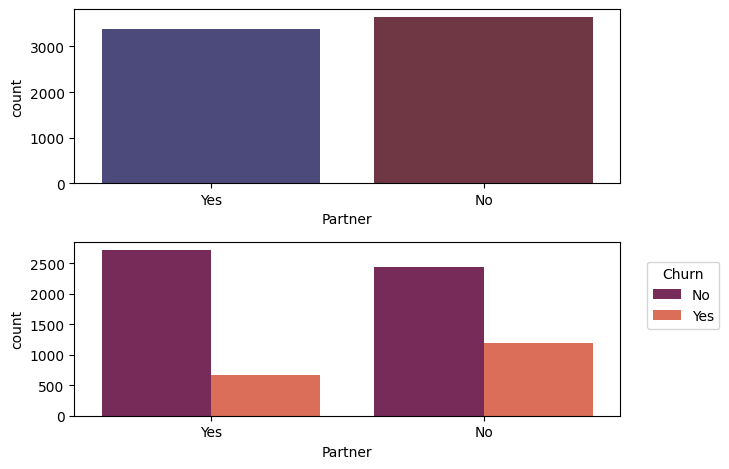

{'No': 4933, 'Yes': 2099}


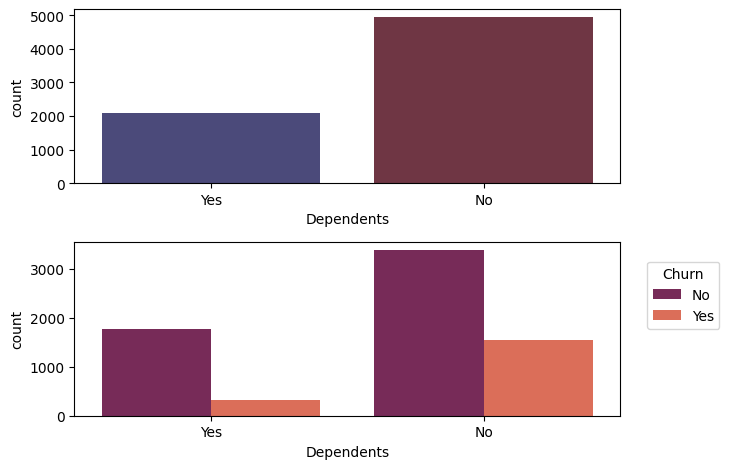

{'Yes': 6352, 'No': 680}


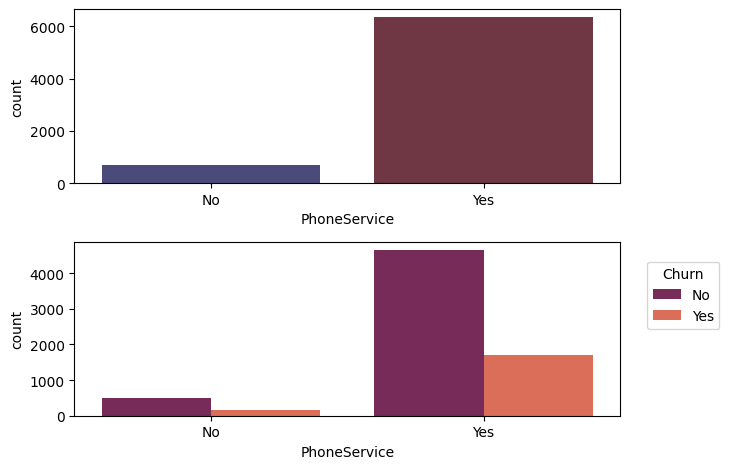

{'No': 3385, 'Yes': 2967, 'No phone service': 680}


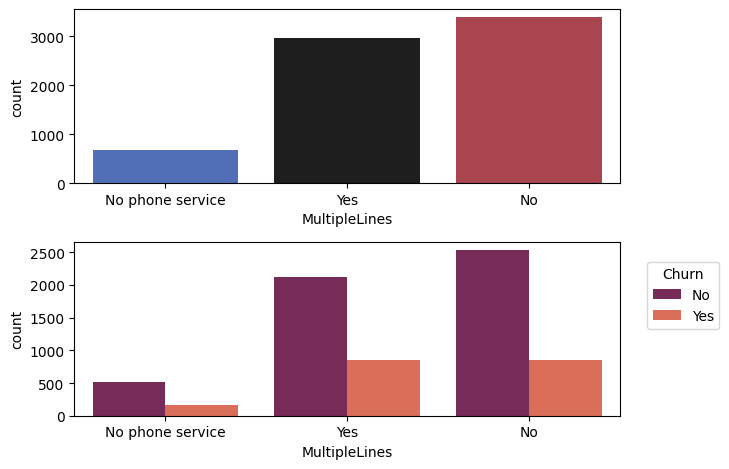

{'Fiber optic': 3096, 'DSL': 2416, 'No': 1520}


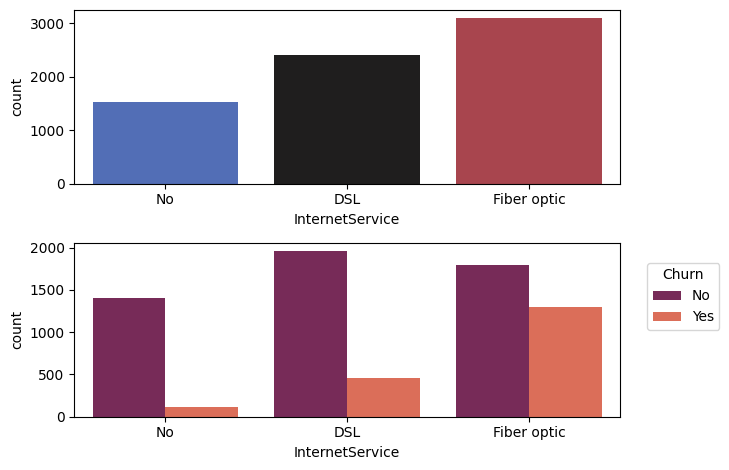

{'No': 3497, 'Yes': 2015, 'No internet service': 1520}


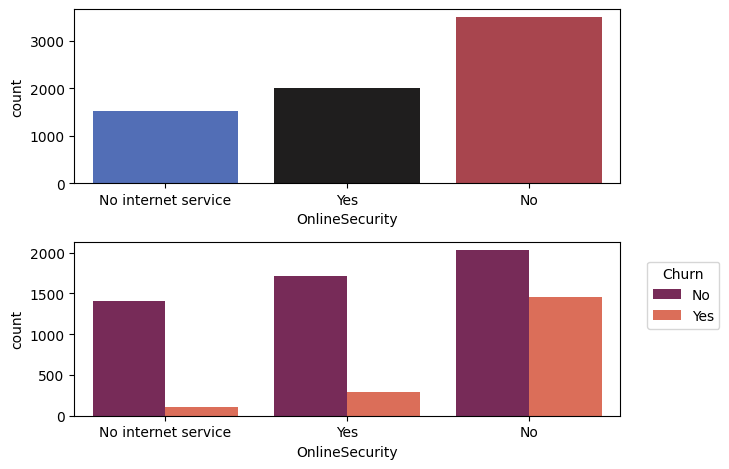

{'No': 3087, 'Yes': 2425, 'No internet service': 1520}


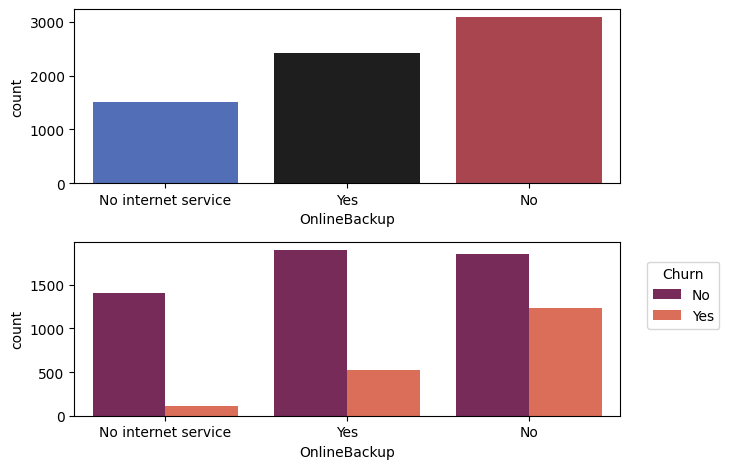

{'No': 3094, 'Yes': 2418, 'No internet service': 1520}


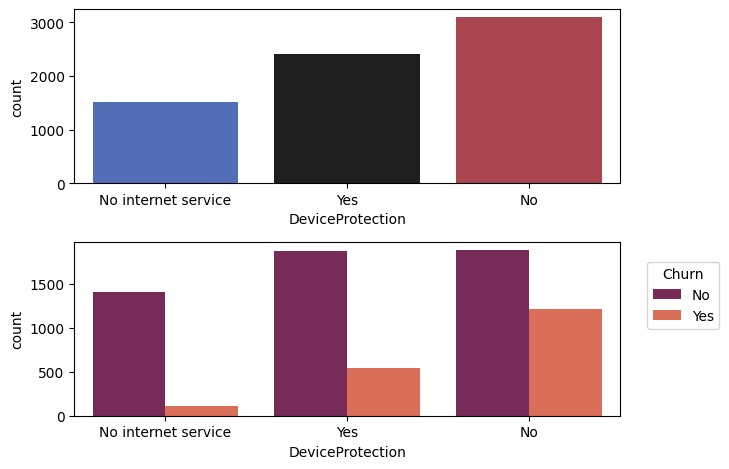

{'No': 3472, 'Yes': 2040, 'No internet service': 1520}


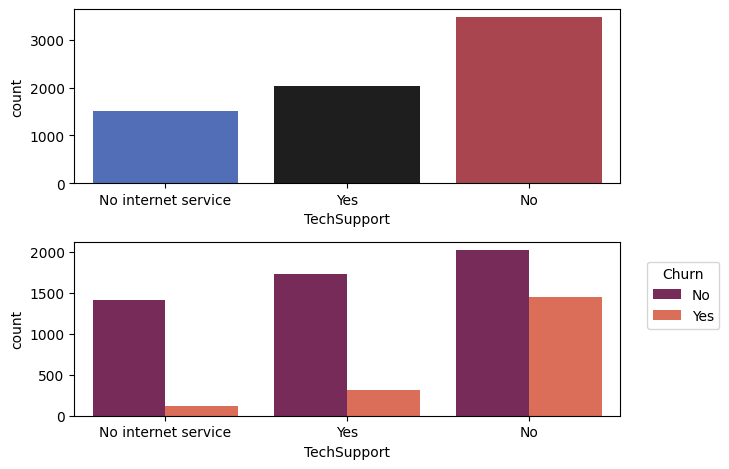

{'No': 2809, 'Yes': 2703, 'No internet service': 1520}


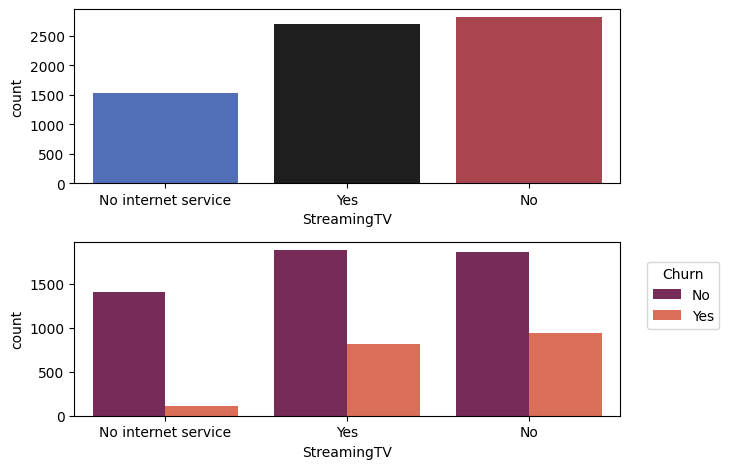

{'No': 2781, 'Yes': 2731, 'No internet service': 1520}


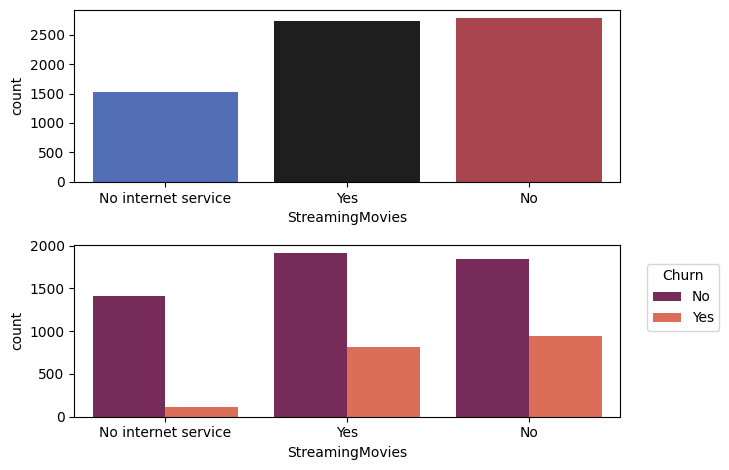

{'Month-to-month': 3875, 'Two year': 1685, 'One year': 1472}


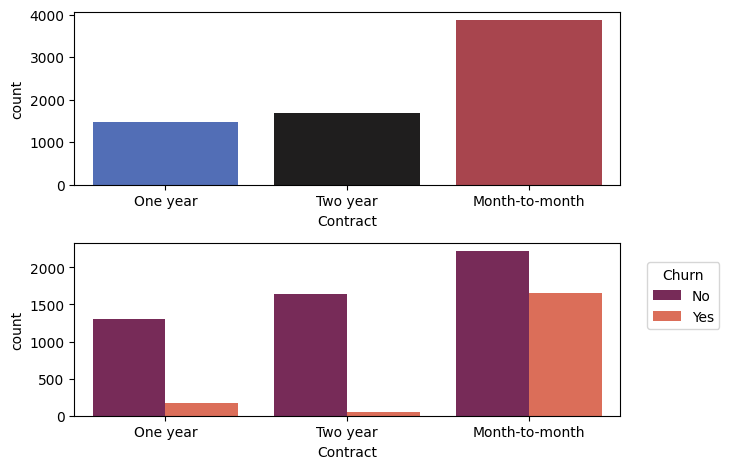

{'Yes': 4168, 'No': 2864}


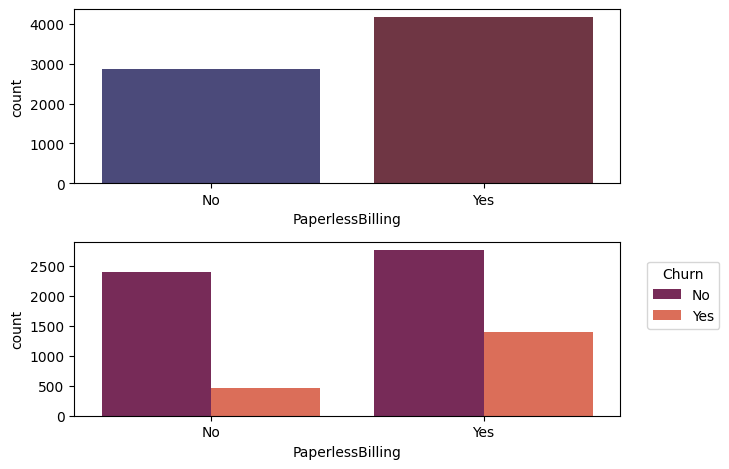

In [120]:
for col in categorical_df.columns:
    if col != 'Churn' and col != 'PaymentMethod':
        plot_countplot(col, 'Churn')

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

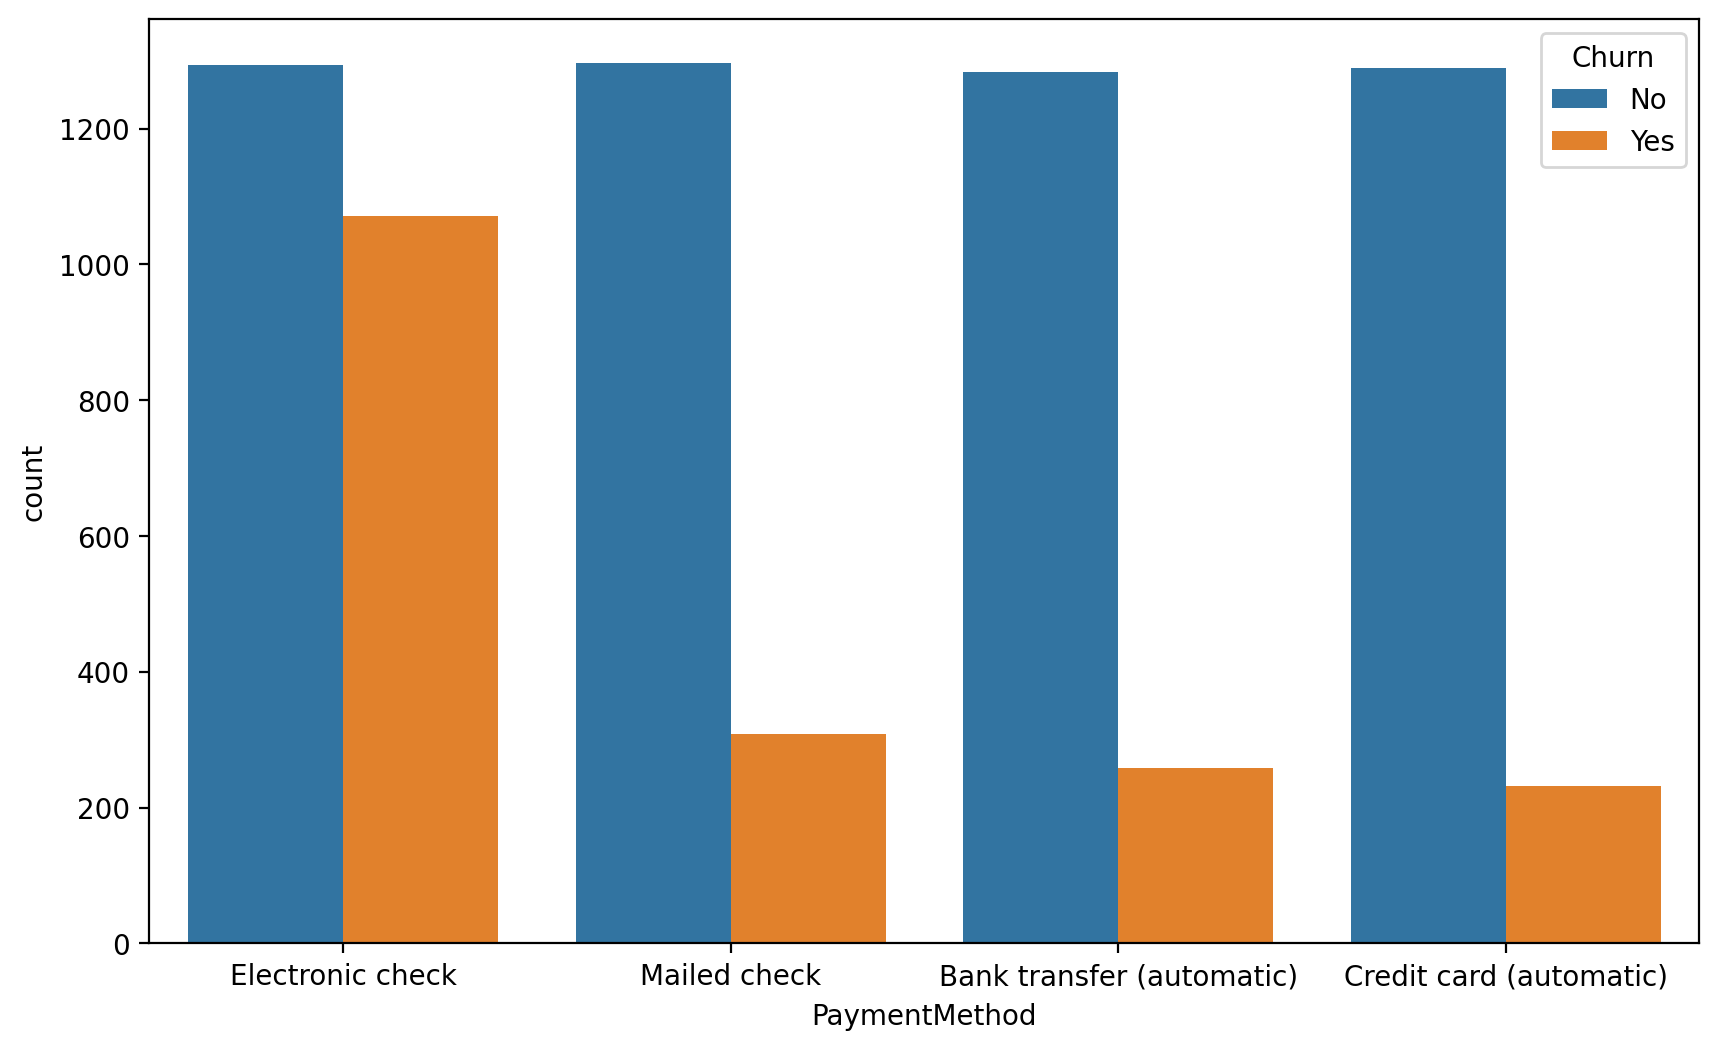

In [123]:
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(data=df, x='PaymentMethod', hue='Churn')

# Построение ML моделей

In [3]:
new_df = df.drop('customerID', axis=1)
new_df['Churn'] = new_df['Churn'].map({'No': 0, 'Yes': 1})
dummy_df = pd.get_dummies(new_df, drop_first=True)

In [4]:
X = dummy_df.drop('Churn', axis=1)
y = dummy_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [5]:
X_categorical_train = X_train.select_dtypes(include='uint8')
X_num_train = X_train.select_dtypes(exclude='uint8')

X_categorical_test = X_test.select_dtypes(include='uint8')
X_num_test = X_test.select_dtypes(exclude='uint8')

scaler = StandardScaler()
X_scaled_num_train = scaler.fit_transform(X_num_train)
X_scaled_num_test = scaler.transform(X_num_test)

# Создание числовых датафреймов
X_scaled_num_train = pd.DataFrame(X_scaled_num_train, columns=X_num_train.columns, index=X_num_train.index)
X_scaled_num_test = pd.DataFrame(X_scaled_num_test, columns=X_num_test.columns, index=X_num_test.index)

X_train = pd.concat([X_scaled_num_train, X_categorical_train], axis=1)
X_test = pd.concat([X_scaled_num_test, X_categorical_test], axis=1)

In [6]:
def get_params_and_predict_model(model, X_test, y_test):
    print(model.best_estimator_.get_params())
    preds = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(y_test, preds))
    RocCurveDisplay.from_estimator(model, X_test, y_test)

## Логистическая регрессия

In [34]:
log_model = LogisticRegression(solver='saga', multi_class='ovr')
C = [0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2', 'elasticnet']
class_weight = ['balanced', None]
l1_ratio = [0.01, 0.1, 0.2, 0.5, 0.9, 1]

In [35]:
param_grid = {'C': C, 'penalty': penalty, 'class_weight': class_weight, 
              'l1_ratio': l1_ratio}

In [36]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

log_grid_model = GridSearchCV(log_model, param_grid=param_grid)
log_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr', solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.9, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [37]:
log_grid_model.best_estimator_.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.9,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       557
           1       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



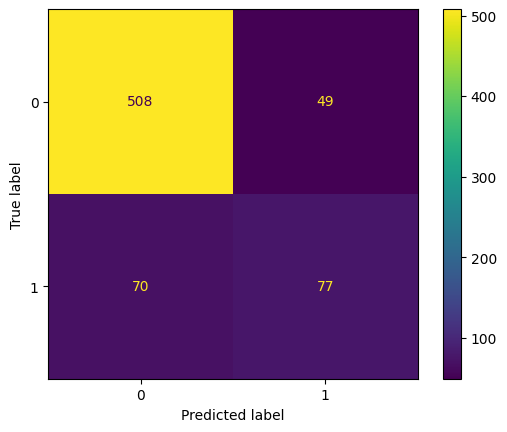

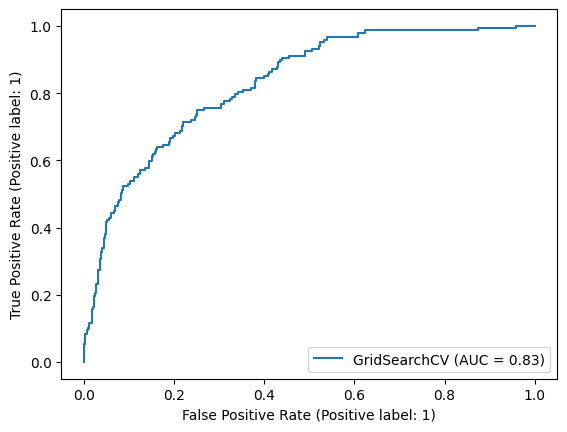

In [39]:
predict_model(log_grid_model, X_test, y_test)

## Метод ближайших соседей с пайплайном

In [40]:
knn_model = KNeighborsClassifier()
scaler = StandardScaler()

In [41]:
prep = [('scaler', scaler), ('knn_model', knn_model)]
pipe = Pipeline(prep)

In [42]:
n_neighbors = [i for i in range(16)]
grid_params = {'knn_model__n_neighbors': n_neighbors}

In [43]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

grid_model = GridSearchCV(pipe, param_grid=grid_params, cv=5, scoring='accuracy')
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                    9, 10, 11, 12, 13, 14,
                                                    15]},
             scoring='accuracy')

In [44]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 14,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.53      0.48      0.51       147

    accuracy                           0.80       704
   macro avg       0.70      0.69      0.69       704
weighted avg       0.80      0.80      0.80       704



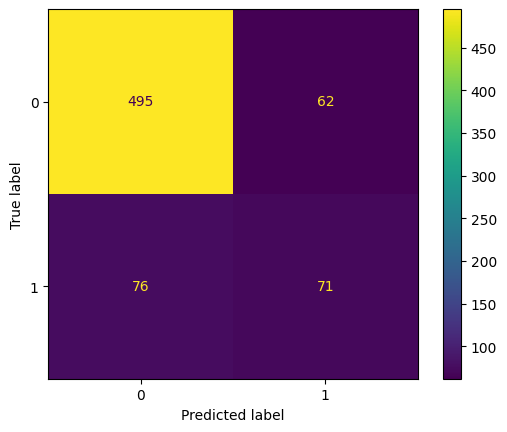

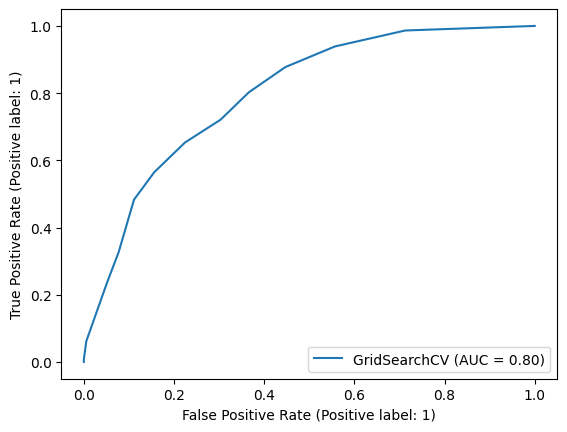

In [45]:
predict_model(grid_model, X_test, y_test)

## Машина опорных векторов

In [7]:
svc = SVC()
C = np.logspace(-4, 4, 5)
gamma = ['scale', 'auto']

In [8]:
params = {'C': C, 'gamma': gamma}

In [9]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

grid_model = GridSearchCV(svc, param_grid=params)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'gamma': ['scale', 'auto']})

In [10]:
grid_model.best_estimator_.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       557
           1       0.61      0.47      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.81      0.83      0.82       704



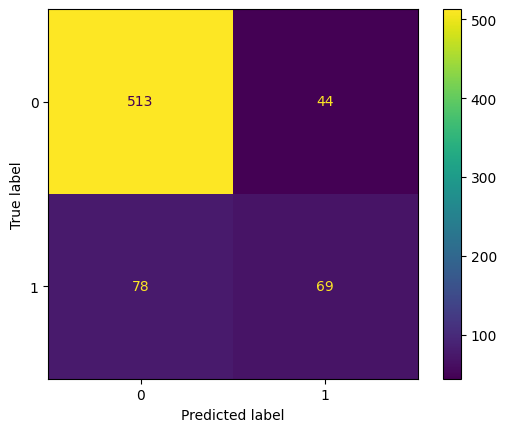

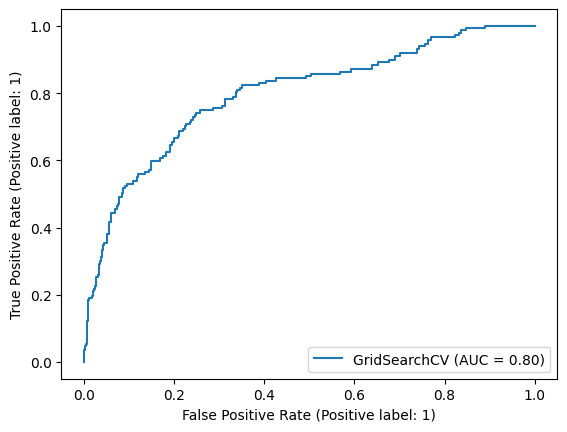

In [11]:
predict_model(grid_model, X_test, y_test)

## Дерево решений

In [14]:
tree = DecisionTreeClassifier()
max_depth = [i for i in range(16)]
class_weight = ['balanced', None]
max_features = [i for i in range(31)]

In [15]:
params = {'max_depth': max_depth, 'class_weight': class_weight, 'max_features': max_features}

In [16]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

grid = GridSearchCV(tree, param_grid=params)
grid.fit(X_train, y_train)

C:\Users\Турбо\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
460 fits failed out of a total of 4960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
310 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Турбо\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Турбо\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Турбо\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.p

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [17]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 21,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       557
           1       0.56      0.48      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



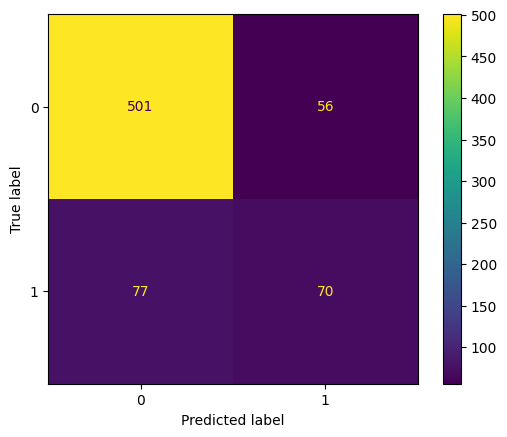

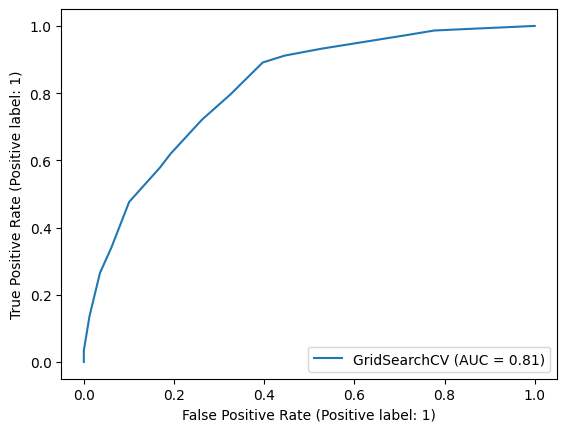

In [18]:
predict_model(grid, X_test, y_test)

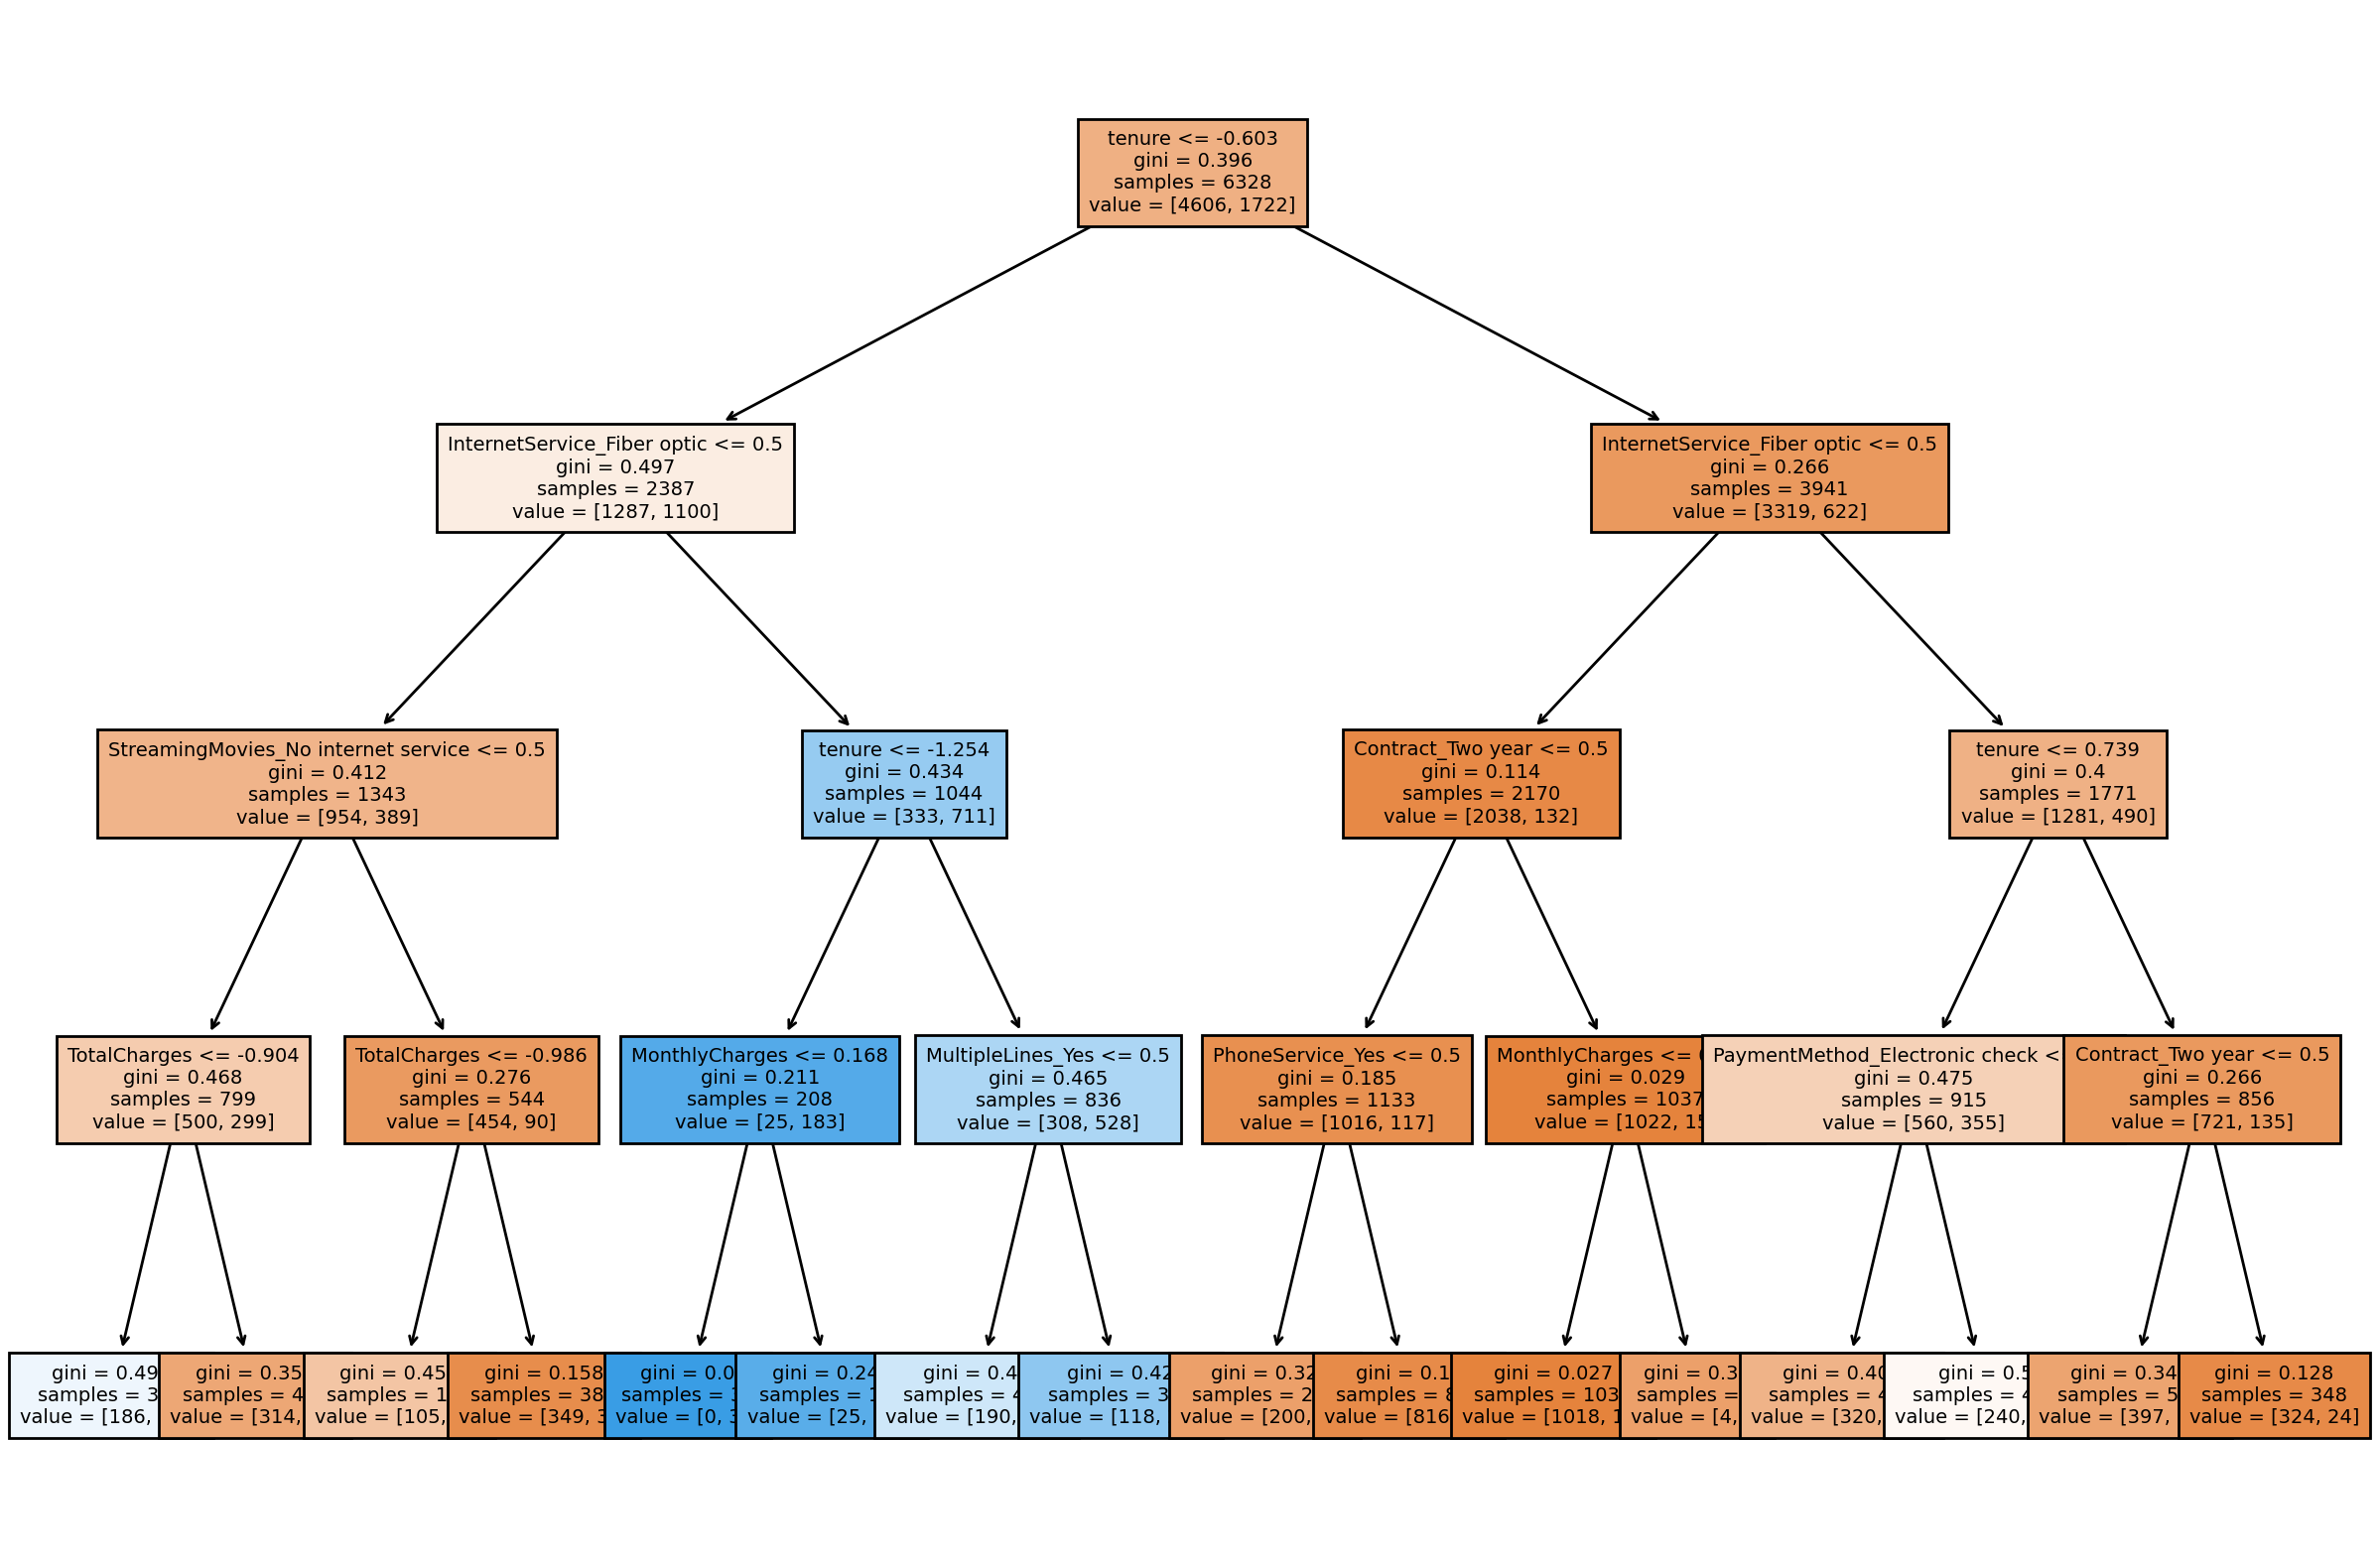

In [51]:
plt.figure(figsize=(15,10), dpi=200)
plot_tree(grid.best_estimator_, feature_names=X_train.columns, filled=True, fontsize=7);

 ## Случайный лес

In [52]:
rf = RandomForestClassifier()
n_estimators = [i for i in range(64, 81)]
max_features = ['sqrt', 'log2']
bootstrap = [True, False]

In [53]:
params = {'n_estimators': n_estimators, 'max_features': max_features, 'bootstrap': bootstrap}

In [54]:
grid = GridSearchCV(rf, param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 65, 66, 67, 68, 69, 70, 71, 72,
                                          73, 74, 75, 76, 77, 78, 79, 80]})

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 74, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       557
           1       0.53      0.47      0.50       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.79      0.80      0.80       704



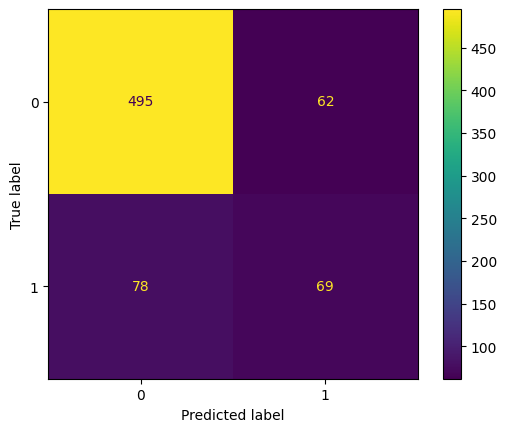

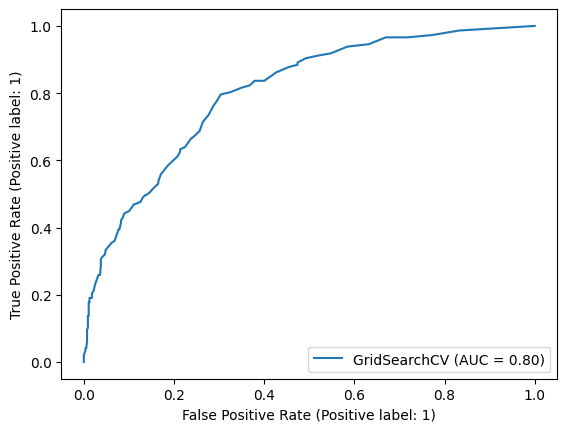

In [61]:
get_params_and_predict_model(grid, X_test, y_test)

## Ada Boosting

In [69]:
ada = AdaBoostClassifier()
n_estimators = [i for i in range(50, 101)]

In [70]:
params = {'n_estimators': n_estimators}

In [71]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

grid_model = GridSearchCV(ada, param_grid=params)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60, 61, 62, 63, 64, 65, 66, 67,
                                          68, 69, 70, 71, 72, 73, 74, 75, 76,
                                          77, 78, 79, ...]})

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 52, 'random_state': None}
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       557
           1       0.62      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.75      0.72      0.74       704
weighted avg       0.83      0.83      0.83       704



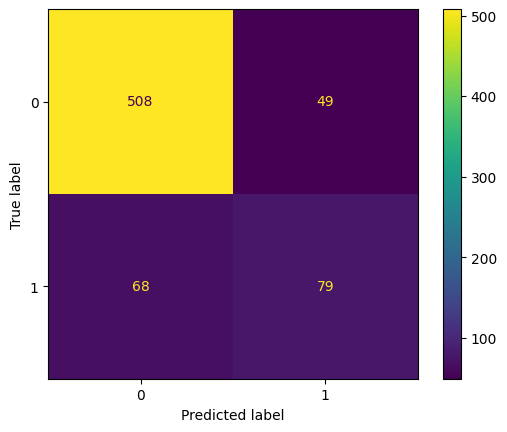

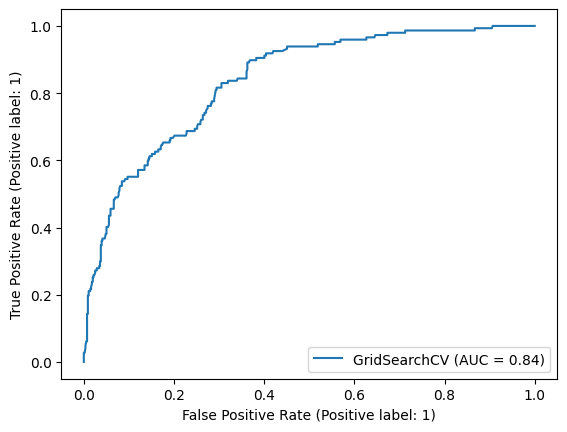

In [72]:
get_params_and_predict_model(grid_model, X_test, y_test)

## Gradient Boosting

In [7]:
gd_tree = GradientBoostingClassifier()
n_estimators = [i for i in range(50, 61)]
max_depth = [3, 4, 5]
learning_rate = [0.05, 0.1, 0.2, 0.5, 1]

In [8]:
params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

In [9]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

grid_model = GridSearchCV(gd_tree, param_grid=params)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 51, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.60      0.49      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



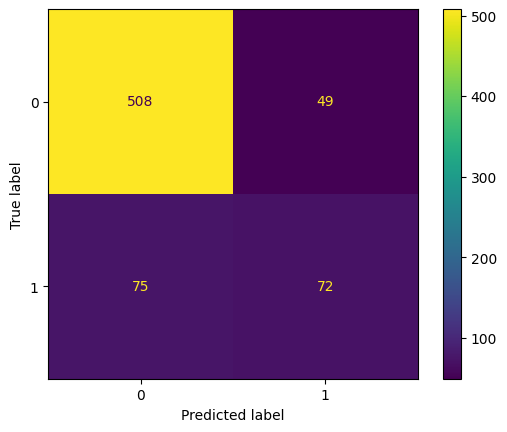

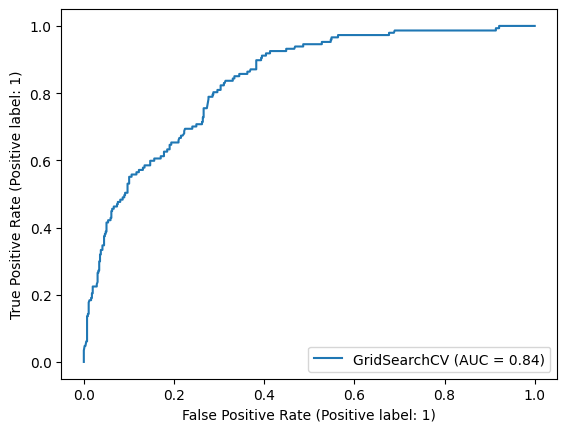

In [10]:
get_params_and_predict_model(grid_model, X_test, y_test)